<a href="https://colab.research.google.com/github/johyunkang/adp_certificate/blob/main/adp_stats_quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기본설정

### 한글 깨짐 문제

In [ ]:
# 1)  첫번째 방법
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False

# 2) 두번째 방법
from matplotlib import font_manager, rc
from matplotlib import style
style.use('ggplot')
%matplotlib inline

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

FileNotFoundError: ignored

### 최대화문제
Q3. 제품 1,2를 만드는데 재료 A,B,C가 일부 사용되며, 제품 1과 2를 만들때 12만원과 18만원을 벌수 있다.

재료는 한정적으로 주어지는데, 이때 최대 수익을 낼수 있을 때의 제품 1과 제품 2의 개수를 구하라

(파이썬 한권으로 끝내기 기출 2-2 통계문제 인데 혹시 이문제를 부등식, 일차함수 활용하는 파이썬으로 구현하시분 계실까야?)

In [59]:
import warnings
warnings.filterwarnings(action='ignore')
from pulp import *

# 최대화 문제로 정의
prob = LpProblem("Profit maximization problem", LpMaximize)

# 변수 정의
x = LpVariable("x", lowBound=0, cat='Integer')
y = LpVariable("y", lowBound=0, cat='Integer')

# 목적 함수 정의
prob += 12 * x + 18 * y

# 부등식(제약 조건) 정의
prob += 2 * x + y <= 24
prob += 2 * x + y <= 18
prob += x + 3 * y <= 21

# 문제 풀기
prob.solve()

# 결과 출력
print("Optimal solution:")
print("x =", int(x.value()))
print("y =", int(y.value()))
print("Maximum profit: $", int(prob.objective.value()))

Optimal solution:
x = 6
y = 5
Maximum profit: $ 162


In [2]:
# pip install pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 11.9 MB/s eta 0:00:00


# ADP 27회
## ADP 27회 머신러닝

### 1번 데이터 확인 및 전처리
- 1-1 EDA 및 데이터 탐색

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/problem1.csv')
df.head()

Time        V1        V2        V3        V4        V5        V6  \
0   60.0  1.069141  0.043786  0.309867  1.316694 -0.462394 -0.857888   
1  406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
2  426.0 -1.932055  1.724618  1.288229 -0.396998 -0.140202  2.470521   
3  472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
4  674.0 -0.719065  0.638954  0.686335 -0.023240  2.317890  3.871978   

         V7        V8        V9       V10       V11       V12       V13  \
0  0.207904 -0.191270  0.056398  0.041567 -0.507358 -0.108666 -0.473257   
1 -2.537387  1.391657 -2.770089 -2.772272  3.202033 -2.899907 -0.595222   
2 -1.865298 -5.186855  0.794764  0.155379  0.034517  0.906738 -0.027172   
3  0.325574 -0.067794 -0.270953 -0.838587 -0.414575 -0.503141  0.676502   
4 -0.312797  1.089780 -0.596925 -0.006142 -0.242883 -0.384491  0.109079   

        V14       V15       V16       V17  Amount  Class  
0  0.452046  1.005675  0.185441 -0.439976   89.40      0  
1 -4.289254  0.389724 -1.140747 -2.830056    0.00      1  
2 -0.404303 -0.473949  0.274034 -0.222340   16.19      0  
3 -1.692029  2.000635  0.666780  0.599717  529.00      1  
4  0.187565  1.823472  0.274346 -0.697730   22.00      0

In [ ]:
display(df.describe())
print(df.info())


Time           V1           V2           V3           V4  \
count    1193.000000  1193.000000  1193.000000  1193.000000  1193.000000   
mean    91514.485331    -0.755027     0.543730    -1.148224     0.777816   
std     47896.081947     3.622262     2.663928     3.908787     2.345566   
min        60.000000   -30.552380   -33.644637   -31.103685    -4.294888   
25%     50265.000000    -1.302600    -0.435358    -1.609339    -0.610310   
50%     81797.000000    -0.302521     0.231973    -0.234204     0.327567   
75%    136995.000000     1.249960     1.112040     0.811507     1.335332   
max    172676.000000     2.320621    19.167239     3.324665    12.114672   

                V5           V6           V7           V8           V9  \
count  1193.000000  1193.000000  1193.000000  1193.000000  1193.000000   
mean     -0.409181    -0.283953    -0.852545     0.145026    -0.446390   
std       2.702077     1.507579     3.396565     2.471559     1.664075   
min     -22.105532   -10.886820   -37.060311   -37.353443   -11.126624   
25%      -0.842184    -1.017863    -0.806043    -0.219328    -1.039740   
50%      -0.073622    -0.379633    -0.084983     0.073036    -0.210455   
75%       0.684224     0.302350     0.464553     0.454794     0.452561   
max      15.275762     6.268481     8.123589    20.007208     5.916809   

               V10          V11          V12          V13          V14  \
count  1193.000000  1193.000000  1193.000000  1193.000000  1193.000000   
mean     -0.904275     0.656342    -1.014185     0.011973    -1.168346   
std       2.902608     1.957200     2.996734     1.013383     3.230613   
min     -23.228255    -2.651584   -17.228662    -2.800154   -18.493773   
25%      -0.883807    -0.601391    -0.967306    -0.692559    -0.950226   
50%      -0.226471     0.283080    -0.014046     0.023014    -0.099055   
75%       0.287274     1.212163     0.512121     0.699744     0.419194   
max       7.135948    11.669205     3.106650     3.068228     3.886382   

               V15          V16          V17      Amount        Class  
count  1193.000000  1193.000000  1193.000000  1193.00000  1193.000000  
mean      0.019232    -0.629529    -1.070657    88.88570     0.167645  
std       0.908008     2.269400     3.812768   220.14133     0.373707  
min      -4.498945   -14.129855   -25.162799     0.00000     0.000000  
25%      -0.549590    -0.701499    -0.682272     3.54000     0.000000  
50%       0.046894    -0.055831    -0.152578    20.99000     0.000000  
75%       0.660619     0.458139     0.368286    77.49000     0.000000  
max       2.869424     3.139656     6.739384  3335.73000     1.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193 entries, 0 to 1192
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1193 non-null   float64
 1   V1      1193 non-null   float64
 2   V2      1193 non-null   float64
 3   V3      1193 non-null   float64
 4   V4      1193 non-null   float64
 5   V5      1193 non-null   float64
 6   V6      1193 non-null   float64
 7   V7      1193 non-null   float64
 8   V8      1193 non-null   float64
 9   V9      1193 non-null   float64
 10  V10     1193 non-null   float64
 11  V11     1193 non-null   float64
 12  V12     1193 non-null   float64
 13  V13     1193 non-null   float64
 14  V14     1193 non-null   float64
 15  V15     1193 non-null   float64
 16  V16     1193 non-null   float64
 17  V17     1193 non-null   float64
 18  Amount  1193 non-null   float64
 19  Class   1193 non-null   int64  
dtypes: float64(19), int64(1)
memory usage: 186.5 KB
None


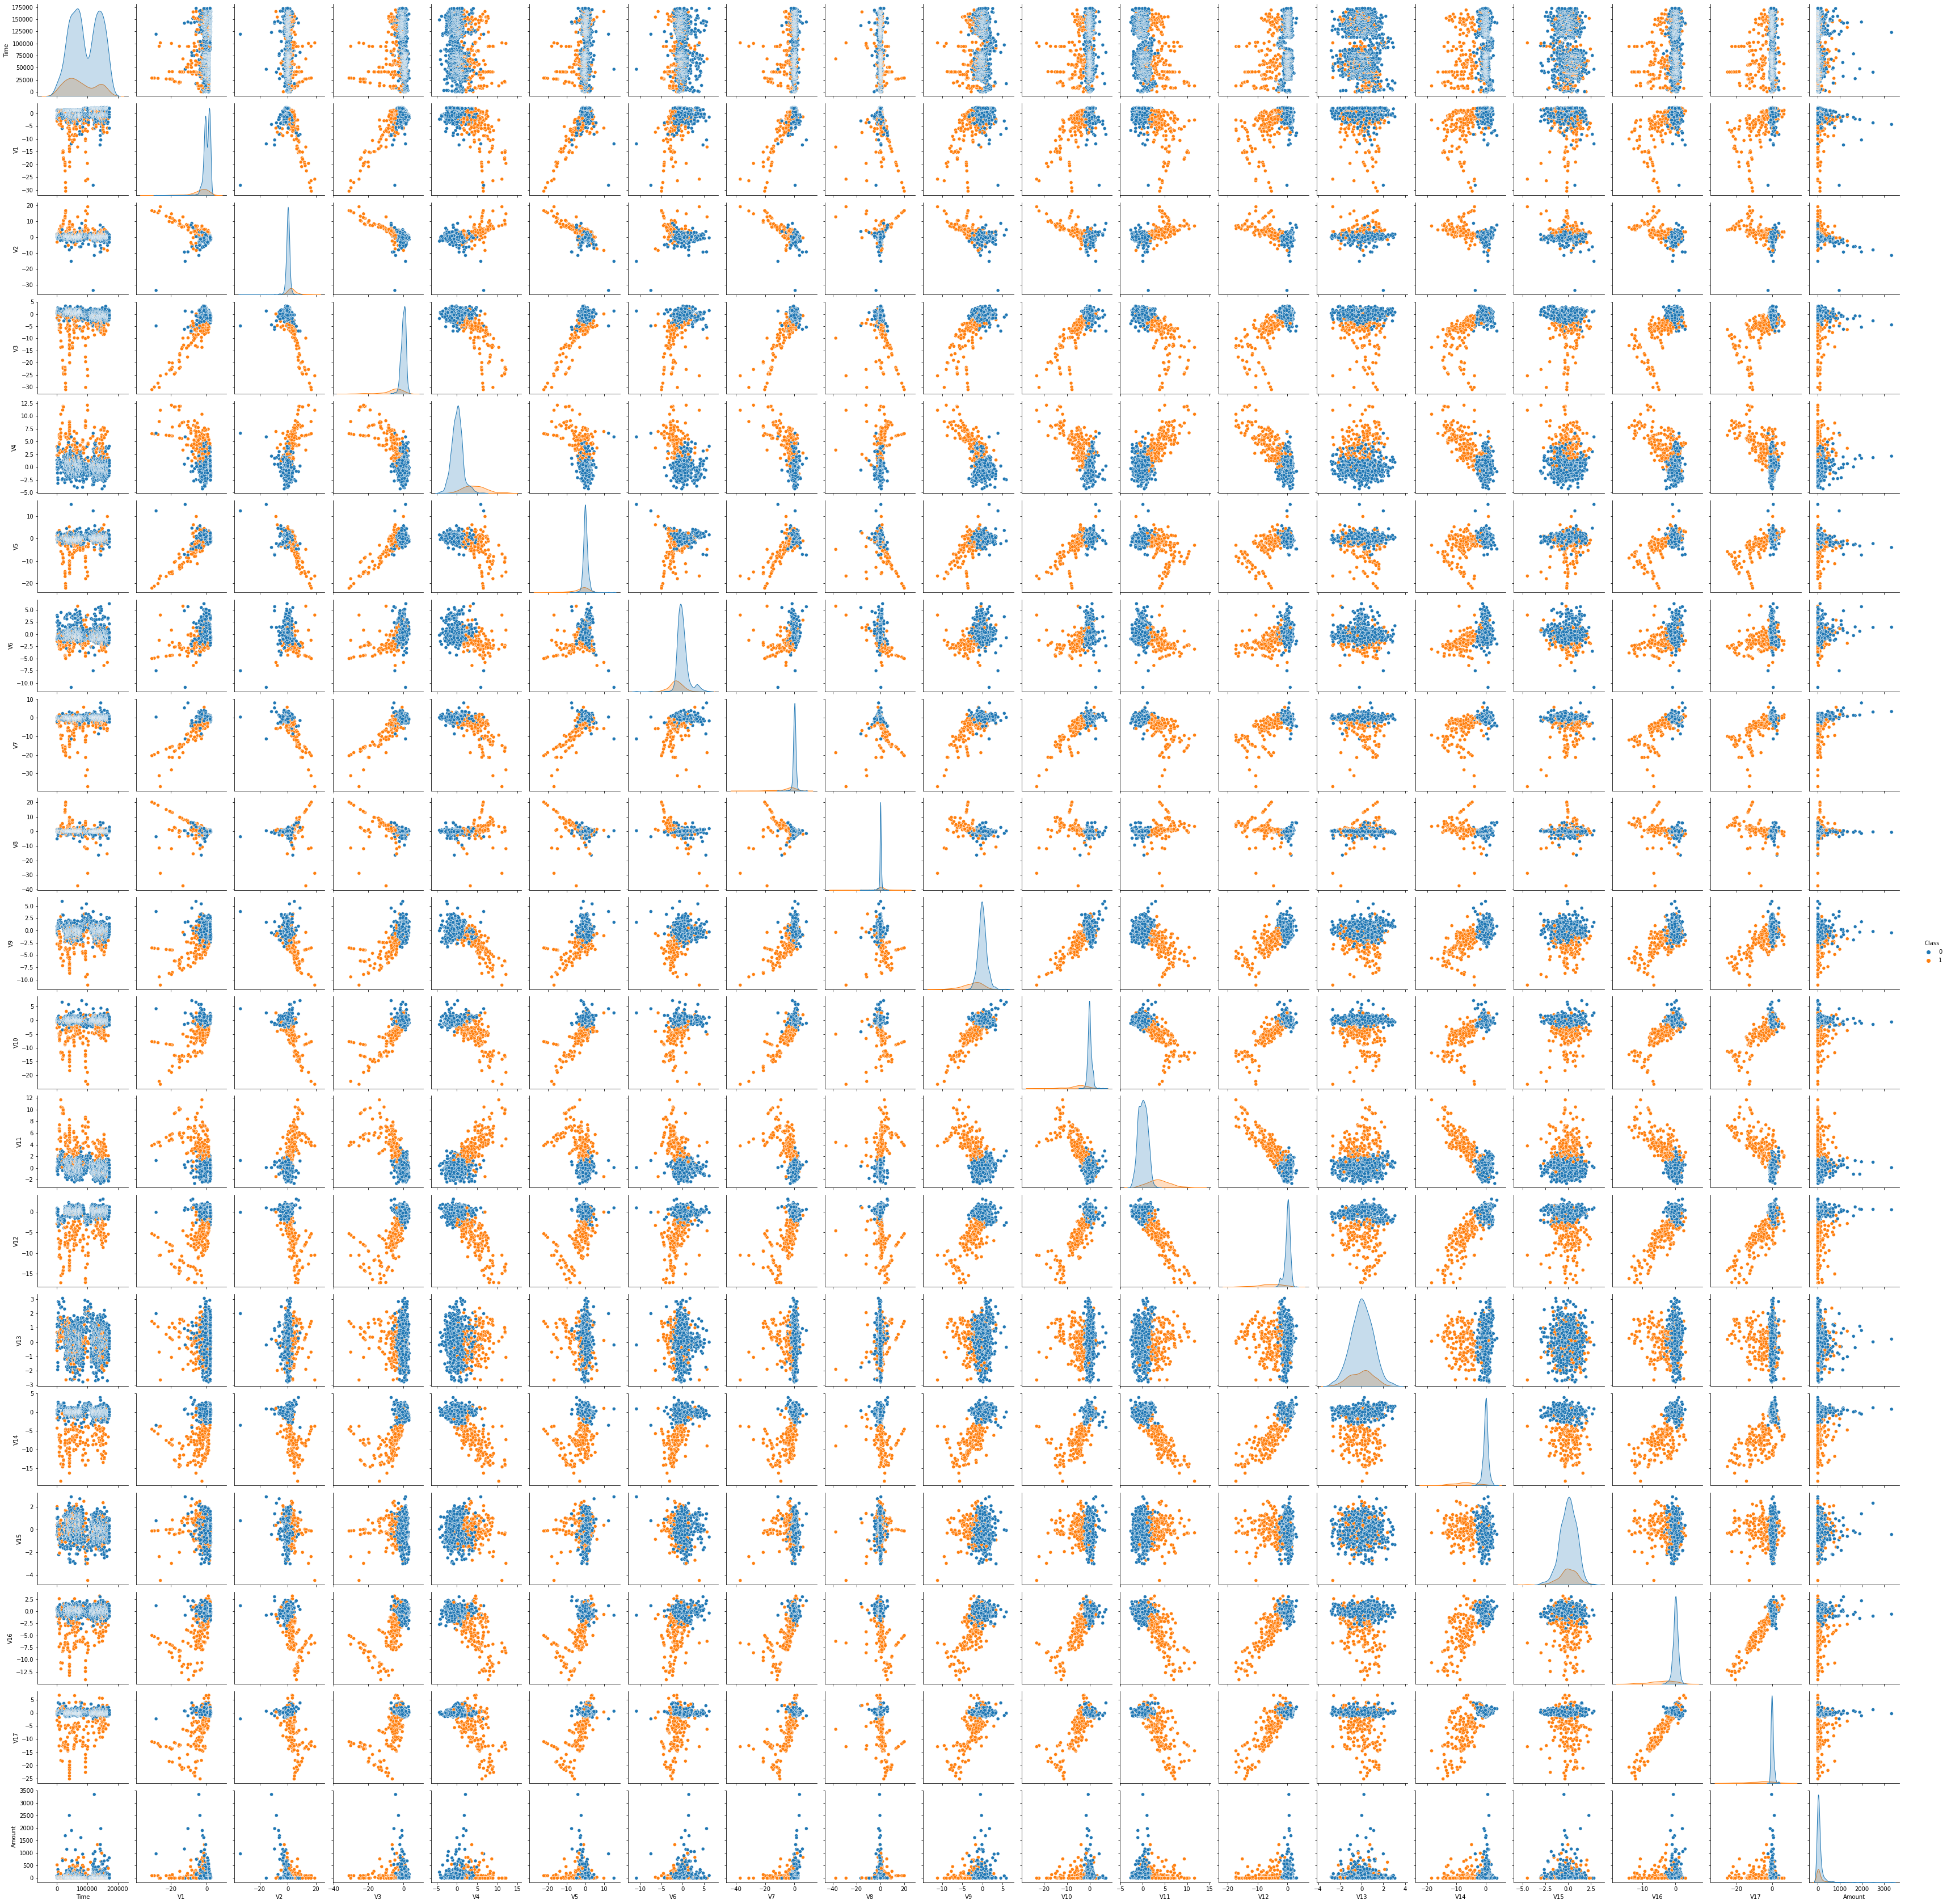

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='Class')

# ADP 27회 통계

Q1. 2년 전 제품 생산량이 100,000개, 1년 전 제품 생산량이 150,000개, 그 후 팩토리 기술의 상승으로 제품 생산량이 250,000개 되었을 때, 연평균 상승률의 대푯값을 구하시오. (반올림하여 소수점 아래 둘째자리까지 표기하시오.)

In [ ]:
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

p2 = 100_000
p1 = 150_000
p0 = 250_000

rt1 = (p1/p2)
rt2 = (p0/p1)
geo_mean=np.sqrt(rt1 * rt2) - 1
print('기하평균:', round(geo_mean * 100, 2), '%')
print('CAGR : ', round(((p0/p2)**(1/2)-1)*100, 2), '%')

기하평균: 58.11 %
CAGR :  58.11 %


#### 조화평균



$속력 = \dfrac {거리} {시간}$

$\dfrac {2ab} {a + b} ,  \dfrac {3abc} {ab+bc+ca}$

$a = \dfrac {d} {t_a}, b = \dfrac {d} {t_b}$


Q. 100km의 거리를 절반은 40km/h 의 속도로 가고, 나머지 50km는 100km/h 속도로 갔다면 평균속력은?

In [ ]:
a = 40
b = 100

ans1 = (2*a*b)/(a + b) # 2ab / (a+b)
print(ans1)

ans2 = 2/(1/a + 1/b) # 2 / (1/a + 1/b)
print(ans2)
       

57.142857142857146
57.14285714285714


#### NPV

In [ ]:
cashflows = [ 10000, 20000, 30000, 40000]
r = 0.05 # 할인률
npv = -70_000 # 최초 투자금액이며 현금 유출이라 (-)로 표시

period = 1 # 1Y: 1, 12month : 12

i=0
# npv=0
for c in cashflows :
    i = i + 1
    npv = npv + c/(1+r)**(i/period)
    print(npv)

print('최종 NPV:', npv)


-60476.19047619047
-42335.600907029475
-16420.472951085194
16487.62604059008
최종 NPV: 16487.62604059008


#### IRR

IRR : NPV가 0이 되는 할인율

In [ ]:
import scipy as sp
import numpy as np
cashflows = [-70000, 10000, 20000, 30000, 40000]

Q2. 8건의 광고시간 측정. 평균 15.5초, 분산 3.2초 일때 90% 신뢰구간은?


In [ ]:
# 정규분포를 가정하며, 집계한 광고 수가 30개 미만이므로 t검정을 사용
from scipy import stats
mu = 15.5
var = 3.2
n = 8
# alpha method will be deprecated. please use confidence parameter instead of alpha.
confidence_level_90 = stats.t.interval(alpha=0.9, loc=mu, scale=np.sqrt(var/n), df=(n-1))
print('90% 신뢰구간:', confidence_level_90)
confidence_level_90_n = stats.t.interval(confidence=0.9, loc=mu, scale=np.sqrt(var/n), df=(n))
print('90% 신뢰구간:', confidence_level_90_n)

90% 신뢰구간: (14.301763280356333, 16.698236719643667)
90% 신뢰구간: (14.323918556586312, 16.676081443413686)


Q3. 18개 강의 상류와 하류의 어류다양성 점수에 차이가 있는지 검정하시오. (단, 같은 강에서 상류-하류는 독립이 아닌 종속)
- 3-1 귀무가설과 대립가설을 설정하라

In [ ]:
# 귀무가설 : 강의 상류와 하류간 어류 다양성 점수는 상관 없다.
# 대립가설 : 강의 상류와 하류간 어류 다양성 점수는 상관이 없지 않다.

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/river.csv')
df.head(3)

River    up  down
0     A  57.1  45.7
1     B  51.6  37.2
2     C  53.9  53.3

- 3-2 통계량을 구하고, 대립가설 채택 여부를 기술하라

In [ ]:
# t 검정을 사용한다고 생각함
# 상류 / 하류 간 독립이 아니라고 했으므로
# 독립표본 검정(쌍검정)이 아닌 대응표본 검정을 실행해야 한다고 생각

from scipy import stats
import pandas as pd


# 먼저 상류와 하류 데이터에 대한 각각의 정규성 검정을 수행
# 표본의 수가 적으니 비모수 검정 해야 하나?
# shapiro 의 귀무가설은 정규분포를 따른다.
# 대립은 정규분포를 따르지 않는다. p값이 0.05 보다 크면 귀무가설 따름
print('정규성검정 상류:', stats.shapiro(df.up))
print('정규성검정 하류:', stats.shapiro(df.down))
print('샘플 데이터는 p-value 가 둘 다 0.05를 초과하여 정규성을 만족하지만, 실제 시험에선 하나가 정규성을 만족하지 못 했음')

# 둘 중 하나가 정규성을 만족하지 못하여
# stats.ttest_rel을 쓰지 못하고, 윌콕슨 부호순위검정을 수행
stats.wilcoxon(df.up, df.down)

# 수행결과 p-value 가 0.05 미만으로 나와 귀무가설을 기각
# 즉, 상-하류간 어류 다양성 점수에 유의미한 차이가 있었다.

정규성검정 상류: ShapiroResult(statistic=0.9635884165763855, pvalue=0.6447699666023254)
정규성검정 하류: ShapiroResult(statistic=0.9821230173110962, pvalue=0.9640804529190063)
샘플 데이터는 p-value 가 둘 다 0.05를 초과하여 정규성을 만족하지만, 실제 시험에선 하나가 정규성을 만족하지 못 했음


WilcoxonResult(statistic=64.5, pvalue=0.24125289916992188)

Q4. 백분위 회귀 문제

user_counts를 종속변수로 하는 데이터이다.

참조 URL : https://amaruak00.github.io/2022/12/17/adp27th.html

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/problem8.csv')
display(df.head(3))
print(df.info())

temperature   wind  precipitation  user_counts
0    10.400000  4.600       0.844944         6368
1     5.666667  4.625       0.040860         5902
2     4.933333  4.725       0.008696         6226

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   temperature    2097 non-null   float64
 1   wind           2097 non-null   float64
 2   precipitation  2097 non-null   float64
 3   user_counts    2097 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 65.7 KB
None


- 4-1 분위수 회귀분석(Quantile Regression)을 사용하여 백분위 50%로 잡고 회귀 계수를 구하시오. (반올림하여 소수점 둘째자리 까지 표기하시오)

In [ ]:
import statsmodels.formula.api as smf
display(df.head(3))

formula = 'user_counts ~ temperature + wind + precipitation'
model = smf.quantreg(formula, df)
result = model.fit(q=0.5) # 백분위 50%
print('\n\n')
display(result.summary())

names = result.params[1:].index
values = result.params[1:].values

print('\n\n답안 : 각 회귀 계수. 소수점 2자리 반올림')
for name, val in zip(names, values) :
    print(name, ':', round(val, 2))

temperature   wind  precipitation  user_counts
0    10.400000  4.600       0.844944         6368
1     5.666667  4.625       0.040860         5902
2     4.933333  4.725       0.008696         6226

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:            user_counts   Pseudo R-squared:               0.3723
Model:                       QuantReg   Bandwidth:                       840.9
Method:                 Least Squares   Sparsity:                        5590.
Date:                Fri, 03 Mar 2023   No. Observations:                 2097
Time:                        09:31:30   Df Residuals:                     2093
                                        Df Model:                            3
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5941.8395    198.127     29.990      0.000    5553.293    6330.386
temperature     268.8920      6.571     40.918      0.000     256.005     281.779
wind           -129.4050     46.259     -2.797      0.005    -220.124     -38.686
precipitation   -83.3843      7.891    -10.567      0.000     -98.859     -67.910
=================================================================================
"""



답안 : 각 회귀 계수. 소수점 2자리 반올림
temperature : 268.89
wind : -129.41
precipitation : -83.38


- 4-2. 4-1 모델의 회귀계수를 활용하여 temperature: 10.5, wind: 8.2, precipitation: 3.5 일때 `user_counts`를 예측하시오

In [ ]:
df_sample = pd.DataFrame(data={'temperature':[10.5], 'wind': [8.2], 'precipitation': [3.5], 'user_counts':np.nan})

df_array = df_sample.to_numpy() # 배열변환
type(df_array)
y_predict = result.predict(df_sample)
print('y_predict:', y_predict)

y_predict: 0    7412.239537
dtype: float64


In [ ]:
intercept = result.params[0:1].values[0]
temp_coef =result.params[1:2].values[0]
wind_coef =result.params[2:3].values[0]
precip_coef =result.params[3:4].values[0]
print(f'intercept: {intercept}, temp coef: {temp_coef}, wind coef:{wind_coef}, precipitation coef:{precip_coef}')

temp = 10.5
wind = 8.2
precip = 3.5

user_counts = intercept + temp*temp_coef + wind*wind_coef + precip * precip_coef
print('\n ANSWER > user_counts:', user_counts)

intercept: 5941.839468669263, temp coef: 268.89201522609073, wind coef:-129.40501314534777, precipitation coef:-83.38428099709998

 ANSWER > user_counts: 7412.239537261514


In [ ]:
# 소니님 답변
import statsmodels.api as sm


model = sm.QuantReg(df['user_counts'], df.drop(columns ='user_counts')).fit(q=0.5)

# 2번문제
df_sample = pd.DataFrame(data={'temperature':[10.5], 'wind': [8.2], 'precipitation': [3.5]})

df_array = df_sample.to_numpy() # 배열변환
# type(df_array)
r = model.predict(df_sample)
print('r:', r)

r: 0    12440.948145
dtype: float64


In [ ]:
# 소니님 답변
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/problem8.csv')
display(df.head(3))
print(df.info())


# 1번문제 
import statsmodels.formula.api as smf
display(df.head(3))

formula = 'user_counts ~ temperature + wind + precipitation'
model = smf.quantreg(formula, df)
result = model.fit(q=0.5) # 백분위 50%
print('\n\n')
display(result.summary())

names = result.params[1:].index
values = result.params[1:].values

print('\n\n답안 : 각 회귀 계수. 소수점 2자리 반올림')
for name, val in zip(names, values) :
    print(name, ':', round(val, 2))




# 2번문제
df_sample = pd.DataFrame(data={'temperature':[10.5], 'wind': [8.2], 'precipitation': [3.5]})

y_predict = result.predict(df_sample)

print('predict:', y_predict)

temperature   wind  precipitation  user_counts
0    10.400000  4.600       0.844944         6368
1     5.666667  4.625       0.040860         5902
2     4.933333  4.725       0.008696         6226

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   temperature    2097 non-null   float64
 1   wind           2097 non-null   float64
 2   precipitation  2097 non-null   float64
 3   user_counts    2097 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 65.7 KB
None


temperature   wind  precipitation  user_counts
0    10.400000  4.600       0.844944         6368
1     5.666667  4.625       0.040860         5902
2     4.933333  4.725       0.008696         6226

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:            user_counts   Pseudo R-squared:               0.3723
Model:                       QuantReg   Bandwidth:                       840.9
Method:                 Least Squares   Sparsity:                        5590.
Date:                Fri, 03 Mar 2023   No. Observations:                 2097
Time:                        09:33:04   Df Residuals:                     2093
                                        Df Model:                            3
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5941.8395    198.127     29.990      0.000    5553.293    6330.386
temperature     268.8920      6.571     40.918      0.000     256.005     281.779
wind           -129.4050     46.259     -2.797      0.005    -220.124     -38.686
precipitation   -83.3843      7.891    -10.567      0.000     -98.859     -67.910
=================================================================================
"""



답안 : 각 회귀 계수. 소수점 2자리 반올림
temperature : 268.89
wind : -129.41
precipitation : -83.38
predict: 0    7412.239537
dtype: float64


### ANOVA 분석에서 사용하는 Type 1, 2, 3의 샘플  예제

type 별 차이는 아래와 같음 ( 답변은 chatpdf)

> Type 1, Type 2, Type 3 ANOVA는 다중선형회귀분석에서 사용되며, 각 독립변수의 효과를 검정하는 방법 중 하나입니다. 이들은 각각 다른 가정을 기반으로 하며, 사용하는 경우에 따라 결과가 달라질 수 있습니다.

> Type 1 ANOVA는 독립변수를 추가하는 순서에 따라 결과가 달라지는 문제가 있습니다. 이 방법은 첫 번째 독립변수부터 순서대로 추가하면서 각 변수의 효과를 검정합니다. 이 때, 이미 추가된 변수들이 해당 변수와 상호작용이 있는 경우에도 해당 변수의 효과를 검정합니다. 따라서 Type 1 ANOVA는 변수 추가 순서에 따라 결과가 달라질 수 있으며, 상호작용이 있는 경우에도 해당 변수의 효과를 검정하기 때문에 일반적으로 사용되지 않습니다.

> Type 2 ANOVA는 Type 1 ANOVA와 마찬가지로 각 독립변수의 효과를 검정하지만, 이미 추가된 변수들이 해당 변수와 상호작용이 있는 경우에는 해당 변수의 효과를 검정하지 않습니다. 이 방법은 일반적으로 Type 1 ANOVA보다 더 많이 사용됩니다.

> Type 3 ANOVA는 다른 변수들이 모두 고정된 상태에서 해당 변수의 효과를 검정하는 방법입니다. 이 방법은 다른 변수들과 해당 변수 간의 상호작용이 있는 경우에 유용합니다.

> 따라서, 어떤 방법을 사용해야 할 지 결정하기 위해서는 분석하고자 하는 데이터와 연구목적을 고려해야 합니다. 일반적으로 Type 2 ANOVA가 가장 널리 사용됩니다.


아래는 chatpdf 가 알려준 샘플 예제 코드

In [ ]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# 데이터 로드
data = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/PlantGrowth.csv')
display(data.head(3))
# 모델 정의
model = ols('weight ~ group', data).fit()

print('\n\n')
display(model.summary())
print('\n\n')
# Type 1 ANOVA 분석 결과 출력
print(anova_lm(model, typ=1))

# Type 2 ANOVA 분석 결과 출력
print(anova_lm(model, typ=2))

# Type 3 ANOVA 분석 결과 출력
print(anova_lm(model, typ=3))

Unnamed: 0  weight group
0           1    4.17  ctrl
1           2    5.58  ctrl
2           3    5.18  ctrl

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     4.846
Date:                Fri, 03 Mar 2023   Prob (F-statistic):             0.0159
Time:                        15:48:42   Log-Likelihood:                -26.810
No. Observations:                  30   AIC:                             59.62
Df Residuals:                      27   BIC:                             63.82
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.0320      0.197     25.527      0.000       4.628       5.436
group[T.trt1]    -0.3710      0.279     -1.331      0.194      -0.943       0.201
group[T.trt2]     0.4940      0.279      1.772      0.088      -0.078       1.066
==============================================================================
Omnibus:                        1.835   Durbin-Watson:                   2.704
Prob(Omnibus):                  0.400   Jarque-Bera (JB):                1.406
Skew:                           0.524   Prob(JB):                        0.495
Kurtosis:                       2.835   Cond. No.                         3.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""




            df    sum_sq   mean_sq         F   PR(>F)
group      2.0   3.76634  1.883170  4.846088  0.01591
Residual  27.0  10.49209  0.388596       NaN      NaN
            sum_sq    df         F   PR(>F)
group      3.76634   2.0  4.846088  0.01591
Residual  10.49209  27.0       NaN      NaN
              sum_sq    df           F        PR(>F)
Intercept  253.21024   1.0  651.602920  1.936575e-20
group        3.76634   2.0    4.846088  1.590996e-02
Residual    10.49209  27.0         NaN           NaN


### 5 지하철 호선과 월별, 승객 수 간 상관관계가 있는지 확인 (type III ANOVA 사용)

샘플데이터 출처 : https://it-freelancer.tistory.com/697

In [27]:
import pandas as pd

df_subway = pd.read_csv('https://github.com/johyunkang/adp_certificate/files/10883822/subway.csv')
display(df_subway.head(3))

line  month  total
0     1      1   1310
1     1      2   1300
2     1      3   1305

### 5-1 귀무가설과 대립가설을 설정하라

In [ ]:
# 귀무가설 : 지하철 호선과 월별, 승객 수 간에는 상관관계가 없다.
# 대립가설 : 지하철 호선과 월별, 승객 수 간에는 상관관계가 없지 않다.

### 5-2 통계량을 구하고, 대립가설 채택 여부를 기술하라

In [28]:
import warnings
warnings.filterwarnings(action='ignore')
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
# from statsmodels.stats.anova import anova_lm

formula = 'total ~ line * month'
model = ols(formula, df_subway).fit()

display(model.summary())
print('\n\n')
print(anova_lm(model, typ=3))

# summary 및 print 해석 공부해라

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.038
Method:                 Least Squares   F-statistic:                    0.1437
Date:                Thu, 09 Mar 2023   Prob (F-statistic):              0.933
Time:                        07:33:49   Log-Likelihood:                -475.01
No. Observations:                  72   AIC:                             958.0
Df Residuals:                      68   BIC:                             967.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1379.3788    121.348     11.367      0.000    1137.233    1621.524
line          24.8561     56.173      0.442      0.660     -87.236     136.948
month          5.3840     16.488      0.327      0.745     -27.517      38.285
line:month    -1.6862      7.632     -0.221      0.826     -16.916      13.544
==============================================================================
Omnibus:                       25.188   Durbin-Watson:                   0.407
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.887
Skew:                           0.749   Prob(JB):                      0.00432
Kurtosis:                       1.824   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""




                  sum_sq    df           F        PR(>F)
Intercept   4.305506e+06   1.0  129.212253  2.239995e-17
line        6.524219e+03   1.0    0.195798  6.595386e-01
month       3.553077e+03   1.0    0.106631  7.450156e-01
line:month  1.626329e+03   1.0    0.048808  8.258132e-01
Residual    2.265841e+06  68.0         NaN           NaN


- Dep.Variable 은 내가 예측하고자한 Y값 데이터이다.
- Residuals 는 n - k 값으로 여기서 n은 데이터 개수, k는 미지수의 개수이다.
- R-squared 는 전체 변동 중에 n%를 설명할 수 있다는 뜻으로, SSR / SST 값이며 여기서 SST 는 SSR + SSE로 표현된다. ( 보통 0.4 이상이면 괜찮은 모델)

이때, 값은 0< R2 = SSR / SST < 1

> ※SST : Sum of Squared Total - 총 변동 , 
> SSR : Sum of Squared Residuals - 설명 안된 변동, 
> SSE: Sum of Squared Error - 설명 된 변동 ( 변동이라는 말이 이해가 안돼서  오차로서 변동을 이해했다.)

- coef - 각 변수에 대한 계수값
- t , P>|t| - t값과 p-value
- Durbin-Watson(더빈왓슨, DW검정) : 잔차의 독립성을 확인할 수 있는 수치
    - 0 이면 잔차들이 양의 자기 상관을 가짐
    - 2 이면 자기 상관이 없는 독립성을 가짐
    - 4 이면 잔차들이 음의 자기 상관을 가짐
    - 보통 1.5 ~ 2.5 사이면 독립으로 판단. 회귀모형이 적합하다 판단.
    - 0 이나 4에 가깝다면 잔차들이 자기상관을 가지고 있다는 의미로 t, F, R제곱을 실제보다 증가시켜 유의미하지 않은 결과를 유의미한 결과로 왜곡하게 됨

즉, R2가 0.4 이상이고, p-value가 0.05 보다 작으면 유의한 결과라고 판단.


## 4.1 교차분석
### 4.1.1 카이제곱 검정이란?
- 카이제곱(X2) 분포에 기초한 통계 방법
- 설명변수가 범주형 자료인 경우 사용
- 각 범주에 따른 결과변수이 분포를 설명하거나, 범주형 변수가 두 개 이상인 경우 두 변수가 상관이 있는지를 검정함
- 기본가정 : 각 범주의 기대빈도가 5 이상이어야 

### 4.1.2 교차분석 개념
- 범주형 자료(명목/서열 수준)인 두 변수 간의 관계를 알아보기 위해 실시하는 분석 기법
- 적합성 검정, 독립성 검정, 동질성 검정에 사용되며, 카이제곱 검정 통계량을 이용함
- 교차분석은 교차표에서 각 셀의 관찰빈도와 기대빈도 간의 차이를 검정함
    - 관찰빈도 : 자료로 부터 얻은 빈도분포
    - 기대빈포 : 두 변수가 독립일 때 이론적으로 기대할 수 있는 빈도분포

# ADP 22회

#### 분산분석
금속 성분 함유량 데이터(변수 1개) - 제품에 금속 재질 함유량의 분산이 1.3을 넘으면 불량이라고 보고 있는데 제조사별로 차이가 난다고 제보를 받았다. 분산에 대해 검정을 수행하시오. (유의확률 0.05)

- 1 연구가설과 귀무가설 작성

- 2 양측 검정 시행

- 3 검정통계량, 가설채택

In [9]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/22/content.csv')
df.head(3)

content
0   97.995295
1  101.478315
2  102.284913

In [14]:
# 파이썬에서는 단일 표본 분산검정 or 단일 표본 카이검정 패키지가 없어서 커스텀해서 사용
from scipy import stats
import numpy as np

def chi_var_test(x, var0, alternative='two-sided'):
    lenth = len(x)
    chi_stat = (lenth-1) * np.var(x, ddof=1) / var0
    
    temp = stats.chi2.cdf(chi_stat, lenth-1)
    if alternative == 'two-sided':
        pval = 2*(1-temp) if temp > 0.5 else 2*temp
    elif alternative == 'greater':
        pval = 1 - temp
    elif alternative == 'less':
        pval = temp
    else:
        print("ERROR")
        
    return chi_stat, pval

# 1 연구가설 귀무가설 작성
# 귀무가설 : 분산은 1.3 이다
# 대립가설 : 분산은 1.3 이 아니다.

# 2. 양측검정 시행
chi_stat, p_val = chi_var_test(df['content'], var0=1.3, alternative='two-sided')
print('p-val:', p_val)
print('stat:', chi_stat)

# 3. 검정통계량, 가설 채택
# p값이 유의수준 0.05 보다 작기에 귀무가설을 기각하고 대립가설을 채택한다.

p-val: 4.2726668647574684e-08
stat: 328.2922980307293


#### 관리중심선

Lot별 200개에 대한 불량 제품 수량 데이터(변수 2개 - lot번호, 불량제품수)

- 1 불량률 관리도에 따라 관리중심선(CL : Center Line), 관리 상한선(UCL : Upper Control Limit), 하한선(LCL : Lower Control Limit) 구하기

- 2 관리도 시각화

In [52]:
import pandas as pd
df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/22/error.csv')
display(df.head(3))
df.rename(columns={'iot_number':'iot', 'error_case_number':'error'}, inplace=True)
display(df.head(3))

iot_number  error_case_number
0           1                4.5
1           2                2.5
2           3                2.0

iot  error
0    1    4.5
1    2    2.5
2    3    2.0

cl: 0.8525 , ucl: 3.3396145201545577 , lcl: -1.6346145201545577


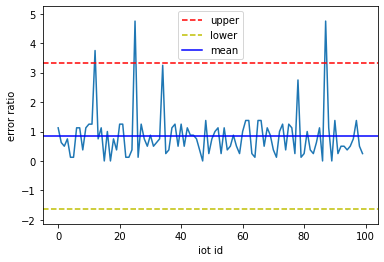

In [54]:
# 1. 3 시그마를 기준으로 상한 하한선을 선정
df['error'] = df['error']/200*100
mu = df['error'].mean()
ucl = mu + df['error'].std()*3
lcl = mu - df['error'].std()*3
print('cl:', mu, ', ucl:', ucl, ', lcl:', lcl)

# 관리도 시각화
min_val = 0
if df['error'].min() > lcl :
    min_val = lcl - 0.5
else :
    min_val = df['error'].min() - 0.5

import matplotlib.pyplot as plt
plt.plot(df['error'])
plt.axhline(y=ucl, color='r', linestyle='--', label='upper')
plt.axhline(y=lcl, color='y', linestyle='--', label='lower')
plt.axhline(y=mu, color='b', label='mean')
plt.legend()
plt.ylabel('error ratio')
plt.xlabel('iot id')
plt.ylim(min_val, df['error'].max()+0.5)
plt.show()

# 23회

### 부호검정
공장에서는 진공관 수명이 1만 시간이라고 주장하여 품질관리팀에서 12개 샘플을 뽑았음 유의수준 5%에서 부호 검정하시오

- 귀무가설 연구가설 세우기
- 유효한 데이터의 숫자는?
- 검정통계량 및 연구 가설 채택 여부를 작성하라

In [57]:
import pandas as pd
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/23/problem2.csv')
df.head(3)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       12 non-null     object
 1   life span  12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 320.0+ bytes
None


In [58]:
# 1.귀무/연구가설 세우기
# 귀무 : 데이터의 중위수는 1만 시간이다.
# 대립 : 데이터의 중위수는 1만 시간이 아니다.

# 2. 유효한 데이터 숫자
print('중위수와 동일한 값들은 부호 순위 검정에서 불필요한 데이터이다.')
print('그 숫자는 ', df[df['life span']== 10_000].shape[0])
df_filter = df[df['life span']!= 10_000]

# 검정통계량 및 연구가설 채택 여부 작성
from scipy.stats import wilcoxon
static, pval = wilcoxon(df_filter['life span']- 10_000)
print('검정통계량은 ', static, '이다. p값은 ', pval, '로 5% 유의수준에서 귀무가설을 기각할 수 없다.')
print('대립가설을 채택하지 않는다.')

중위수와 동일한 값들은 부호 순위 검정에서 불필요한 데이터이다.
그 숫자는  4
검정통계량은  8.5 이다. p값은  0.1953125 로 5% 유의수준에서 귀무가설을 기각할 수 없다.
대립가설을 채택하지 않는다.


# 23회 ANOVA

아래 이미지와 같은 학과별 학점 분포 인원수 표가 있다. 학과와 성적이 관계있는지를 검정하라

- 귀무가설 연구가설 세우기
- 학과와 성적이 독립일 경우의 기댓값을 구하시오
- 검정통계량 및 연구 가설 채택 여부를 작성하라


![q1](https://user-images.githubusercontent.com/291782/223933644-5ff12350-7c00-42d5-b564-153946a2701f.png)

In [10]:
df = pd.DataFrame({'사회과학':[15,60,24],'자연과학':[25,69,5],'공학':[10,77,13]})
df.index = ['1.5-2.5','2.5-3.5','3.5-4.5']
display(df.head(3))

# 1. 귀무/연구가설
# 귀무가설 : 학과와 성적은 관계가 없다.(독립이다)
# 대립가설 : 학과와 성적은 관계가 없지 않다. (독립이 아니다.)

# 2. 학과와 성적이 독립일 경우의 기댓값을 구하시오
from scipy.stats import chi2_contingency, fisher_exact
chi2, p, dof, expected = chi2_contingency(df)
print('expected:', expected)

# 3. 검정통계량 및 연구가설 채택 여부를 작성하라
print('p-val:', p)
print('카이제곱 검정 시 p값은 ', round(p, 5), '로 유의수준 0.05에서 귀무가설을 기각한다.')
print('즉, 학과와 성적은 관계가 없지 않다.')
print('만약 5보다 작은 셀이 20%가 넘어간다면(75%) 피셔의 정확성 검정을 사용해야 한다.')
# print(fisher_exact(df))

사회과학  자연과학  공학
1.5-2.5    15    25  10
2.5-3.5    60    69  77
3.5-4.5    24     5  13

expected: [[16.61073826 16.61073826 16.77852349]
 [68.43624161 68.43624161 69.12751678]
 [13.95302013 13.95302013 14.09395973]]
p-val: 0.00018822647762421383
카이제곱 검정 시 p값은  0.00019 로 유의수준 0.05에서 귀무가설을 기각한다.
즉, 학과와 성적은 관계가 없지 않다.
만약 5보다 작은 셀이 20%가 넘어간다면(75%) 피셔의 정확성 검정을 사용해야 한다.


# 24회
광고횟수와 광고비에 따른 매출액의 데이터이다

- 1 광고비 변수를 가변수 처리후 다중회귀를 수행하여 회귀계수가 유의한지 검정
- 2 회귀식이 유의한지 판단

In [24]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/24/problem2.csv',encoding='cp949')
df.head(3)

광고횟수 광고비  매출액
0     2  낮음   15
1     3  낮음   16
2     4  낮음   17

In [25]:
# 1. 광고비 변수를 가변수 처리 후 다중회귀를 수행하여 회귀계수가 유의한지 검정
df['광고비'] = df['광고비'].map({'낮음':0, '높음':1})
print(df['광고비'].value_counts())

import statsmodels.api as sm
x = sm.add_constant(df[['광고횟수', '광고비']])
model = sm.OLS(df['매출액'], x).fit()
for variable, p_val in zip(x.columns, model.pvalues) :
    print(f'{variable} : {p_val}')

print('회귀계수의 p값을 추출 했을 때 광고비만 0.05를 초과한다.')
print('이는 광고비만 유의하지 않다고 볼 수 있다.')

# 2.회귀식이 유의한지 판단
print(model.summary())
print('모델요약은 위와 같다. 회귀식의 F static의 p-value는 9.96e-08로')
print('해당 회귀식은 유의하다고 볼 수 있다.')

1    6
0    5
Name: 광고비, dtype: int64
const : 2.011914203449039e-08
광고횟수 : 4.935242822849267e-08
광고비 : 0.357962877314944
회귀계수의 p값을 추출 했을 때 광고비만 0.05를 초과한다.
이는 광고비만 유의하지 않다고 볼 수 있다.
                            OLS Regression Results                            
Dep. Variable:                    매출액   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     221.2
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           9.96e-08
Time:                        07:29:35   Log-Likelihood:                -11.883
No. Observations:                  11   AIC:                             29.77
Df Residuals:                       8   BIC:                             30.96
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std 

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# 24회
각 공장별로 12개의 제품을 추출하여 구한 정보가 A생산라인의 제품 평균은 5.7mm이고 표준편차는 0.03, B생산라인의 제품 평균은 5.6mm이고 표준편차는 0.04라면 5%유의수준으로 두 제품의 평균이 차이가 있는지 여부를 검정하기 Z(0.05) = 1.65

- 1 귀무가설과 대립가설을 세워라
- 2 두 평균이 차이가 있는지 검정하라

In [29]:
import numpy as np
from scipy import stats

# A생산라인의 평균, 표준편차
mean_A = 5.7
std_A = 0.03

# B생산라인의 평균, 표준편차
mean_B = 5.6
std_B = 0.04

# 데이터의 갯수
n = 12

# 검정 결과
z_score = (mean_A - mean_B) / np.sqrt(std_A**2/n + std_B**2/n)
p_value = stats.norm.sf(z_score)

# 유의수준 5% 이하이면 귀무가설(두 평균의 차이가 없음) 기각, 차이가 있음 결론
alpha = 0.05
if p_value <= alpha:
    print(f"pvalue는 {p_value}로 A생산라인과 B생산라인의 평균에 차이가 존재합니다.")
else:
    print(f"pvalue는 {p_value}로 A생산라인과 B생산라인의 평균에 차이가 없습니다.")

pvalue는 2.1310957989212665e-12로 A생산라인과 B생산라인의 평균에 차이가 존재합니다.


In [30]:
help(stats.norm.sf)

Help on method sf in module scipy.stats._distn_infrastructure:

sf(x, *args, **kwds) method of scipy.stats._continuous_distns.norm_gen instance
    Survival function (1 - `cdf`) at x of the given RV.
    
    Parameters
    ----------
    x : array_like
        quantiles
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    sf : array_like
        Survival function evaluated at x



# 25
1개년 50억원, 2개년 60억원, 3개년 70억원의 예산을 가지고 NPV(순현재가치)가 가장 높아지는 안을 제시하시오

![stat-npv](https://user-images.githubusercontent.com/291782/223960201-567562df-640a-42f0-9f6b-c63cbee1dca9.png)

In [43]:
import pandas as pd
df = pd.DataFrame([[10, 20, 15],
                   [15, 14, 19],
                   [12, 11, 30],
                   [13, 25, 20],
                   [16, 30, 24]], 
                  columns=['1y', '2y', '3y'], 
                  index=[1,2,3,4,5])
df.head(3)

1y  2y  3y
1  10  20  15
2  15  14  19
3  12  11  30

In [44]:
df['total'] = df.sum(axis=1)
df.head(5)

1y  2y  3y  total
1  10  20  15     45
2  15  14  19     48
3  12  11  30     53
4  13  25  20     58
5  16  30  24     70

In [50]:
# pip install pulp
import pulp
prob = pulp.LpProblem(
    name='simple program',
    sense = pulp.LpMaximize)

# cat=Integer | Continuous(default) | Binary
x1 = pulp.LpVariable('x1', lowBound=0, upBound=1, cat='Integer')
x2 = pulp.LpVariable('x2', lowBound=0, upBound=1, cat='Integer')
x3 = pulp.LpVariable('x3', lowBound=0, upBound=1, cat='Integer')
x4 = pulp.LpVariable('x4', lowBound=0, upBound=1, cat='Integer')
x5 = pulp.LpVariable('x5', lowBound=0, upBound=1, cat='Integer')

# # 목적함수 정의
prob += 45*x1 + 48*x2 + 53*x3 + 58*x4 + 70*x5

# 부등식(제약 조건) 정의
prob += 10*x1 + 15*x2 + 12*x3 + 13*x4 + 16*x5 <=50
prob += 20*x1 + 14*x2 + 11*x3 + 25*x4 + 30*x5 <=60
prob += 15*x1 + 19*x2 + 30*x3 + 20*x4 + 24*x5 <=70

# 문제 풀기
prob.solve()

# 결과 출력
print("Optimal solution:")
print("x1 =", int(x1.value()))
print("x2 =", int(x2.value()))
print("x3 =", int(x3.value()))
print("x4 =", int(x4.value()))
print("x5 =", int(x5.value()))
print("Maximum profit: $", int(prob.objective.value()))

Optimal solution:
x1 = 0
x2 = 1
x3 = 1
x4 = 1
x5 = 0
Maximum profit: $ 159


# 26회
아래 그래프는 A,B,C 자치구별 W 의원에 대한 찬성, 반대 지지를 나타낸다. 자치구별 지지율이 같은지에 대해서 검정하라

- 1 연구가설과 귀무가설을 설정하라
- 2 검정통계량 구하고 결론을 내라


|      |  A   |  B   |  C   |
| :--: | :--: | :--: | :--: |
| 찬성 | 176  | 193  | 159  |
| 반대 | 124  | 107  | 141  |


In [70]:
df = pd.DataFrame({'A':[176, 245], 'B':[193, 107], 'C':[159,141]}, index=['찬성', '반대'])
df.head()

# 1. 연구가설과 귀무가설을 설정
# 귀무가설 : 자치구별 지지율은 차이가 없다.
# 대립가설 : 자치구별 지지율은 차이가 없지 않다.

# 2. 검정통계량을 구하고 결론
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(df)

df_expected = pd.DataFrame(expected, columns=['A', 'B', 'C'], index=['찬성', '반대'])
print('검정통계량 X2:', chi2)
print('\n expected values')
display(df_expected)

# 3. 검정통계량 및 연구가설 채택 여부를 작성하라
print('p-val:', p)
print('카이제곱 검정 시 p값은 ', p, '로 유의수준 0.05 보다 작아 귀무가설을 기각한다.')
print('즉, 자치구별 지지율은 차이가 없지 않다의 대립가설을 채택한다.')


검정통계량 X2: 35.88448662796218

 expected values


A           B           C
찬성  217.715965  155.142018  155.142018
반대  203.284035  144.857982  144.857982

p-val: 1.6135511446645336e-08
카이제곱 검정 시 p값은  1.6135511446645336e-08 로 유의수준 0.05 보다 작아 귀무가설을 기각한다.
즉, 자치구별 지지율은 차이가 없지 않다의 대립가설을 채택한다.
